In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [10]:
data=pd.read_excel('D:\VS Code\Arun\Assignment-1_Data.xlsx')

In [11]:
data.head()

BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   Price  CustomerID         Country  
0   2.55     17850.0  United Kingdom  
1   3.39     17850.0  United Kingdom  
2   2.75     17850.0  United Kingdom  
3   3.39     17850.0  United Kingdom  
4   3.39     17850.0  United Kingdom

In [12]:
data.tail()

BillNo                         Itemname  Quantity                Date  \
522059  581587      PACK OF 20 SPACEBOY NAPKINS        12 2011-12-09 12:50:00   
522060  581587      CHILDREN'S APRON DOLLY GIRL         6 2011-12-09 12:50:00   
522061  581587     CHILDRENS CUTLERY DOLLY GIRL         4 2011-12-09 12:50:00   
522062  581587  CHILDRENS CUTLERY CIRCUS PARADE         4 2011-12-09 12:50:00   
522063  581587     BAKING SET 9 PIECE RETROSPOT         3 2011-12-09 12:50:00   

        Price  CustomerID Country  
522059   0.85     12680.0  France  
522060   2.10     12680.0  France  
522061   4.15     12680.0  France  
522062   4.15     12680.0  France  
522063   4.95     12680.0  France

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


In [14]:
data.shape

(522064, 7)

In [15]:
data.describe()

Quantity                           Date          Price  \
count  522064.000000                         522064  522064.000000   
mean       10.090435  2011-07-04 12:51:20.777107456       3.826801   
min     -9600.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 10:15:00       1.250000   
50%         3.000000            2011-07-20 08:59:00       2.080000   
75%        10.000000            2011-10-19 14:12:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   13541.330000   
std       161.110525                            NaN      41.900599   

          CustomerID  
count  388023.000000  
mean    15316.931710  
min     12346.000000  
25%     13950.000000  
50%     15265.000000  
75%     16837.000000  
max     18287.000000  
std      1721.846964

In [16]:
data[data['Quantity']<0]

BillNo Itemname  Quantity                Date  Price  CustomerID  \
2359    536589      NaN       -10 2010-12-01 16:50:00    0.0         NaN   
4289    536764      NaN       -38 2010-12-02 14:42:00    0.0         NaN   
6998    536996      NaN       -20 2010-12-03 15:30:00    0.0         NaN   
6999    536997      NaN       -20 2010-12-03 15:30:00    0.0         NaN   
7000    536998      NaN        -6 2010-12-03 15:30:00    0.0         NaN   
...        ...      ...       ...                 ...    ...         ...   
515634  581210    check       -26 2011-12-07 18:36:00    0.0         NaN   
515636  581212     lost     -1050 2011-12-07 18:38:00    0.0         NaN   
515637  581213    check       -30 2011-12-07 18:38:00    0.0         NaN   
517209  581226  missing      -338 2011-12-08 09:56:00    0.0         NaN   
519172  581422  smashed      -235 2011-12-08 15:24:00    0.0         NaN   

               Country  
2359    United Kingdom  
4289    United Kingdom  
6998    United Kingdom  
6999    United Kingdom  
7000    United Kingdom  
...                ...  
515634  United Kingdom  
515636  United Kingdom  
515637  United Kingdom  
517209  United Kingdom  
519172  United Kingdom  

[1336 rows x 7 columns]

(-0.5, 1999.5, 999.5, -0.5)

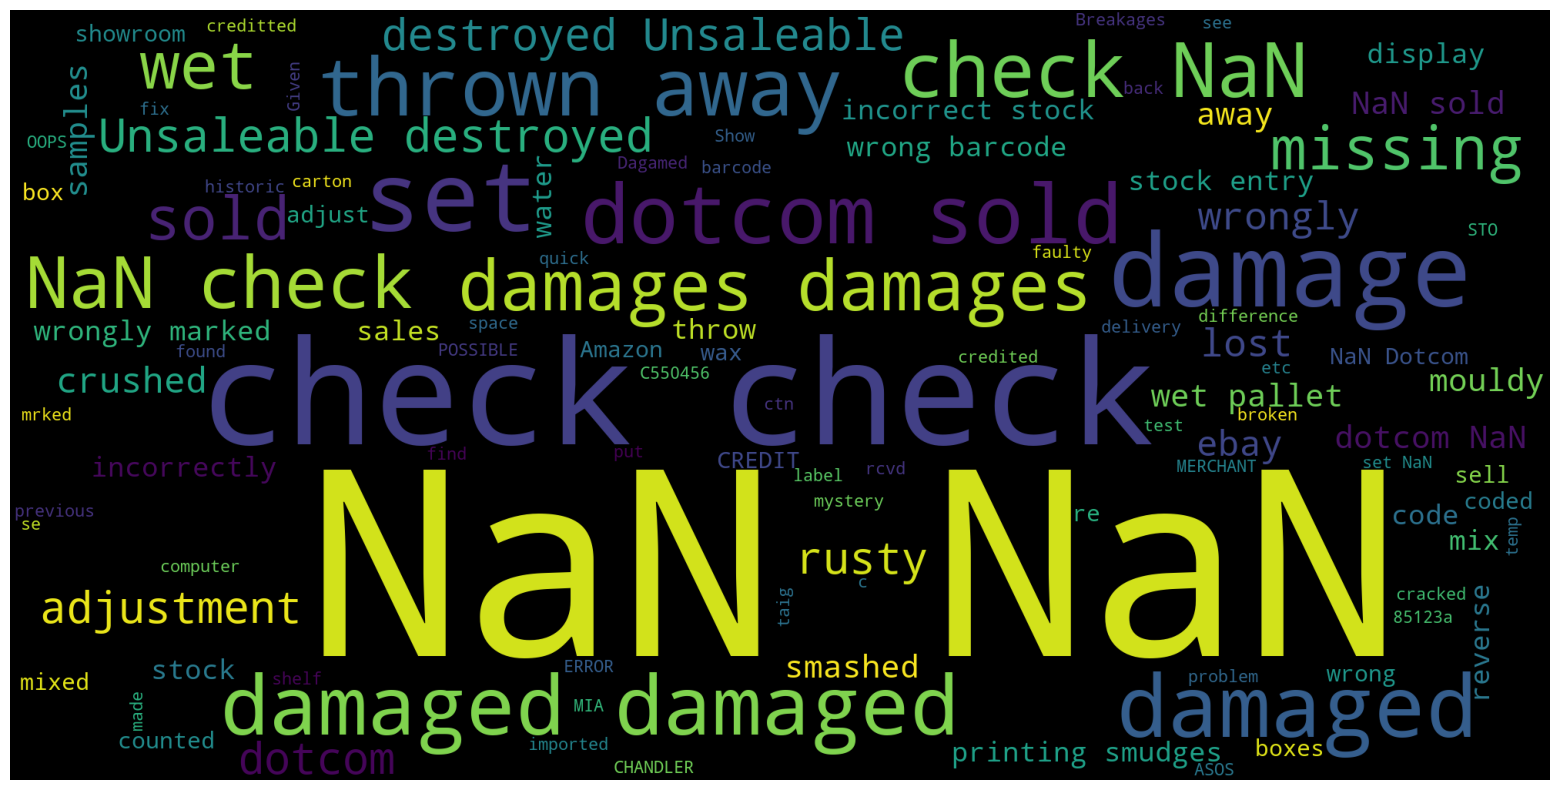

In [18]:
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS
worldcloud= WordCloud(background_color='Black',stopwords=stopwords, height=1000, width =2000)

temp=data[data['Quantity']<0]
body =temp['Itemname'].to_string(index=False)
### Generate word cloud
worldcloud.generate(body)
## Visualize
plt.figure(figsize=(22,10))
plt.imshow(worldcloud)
plt.axis("off")

(-0.5, 1999.5, 999.5, -0.5)

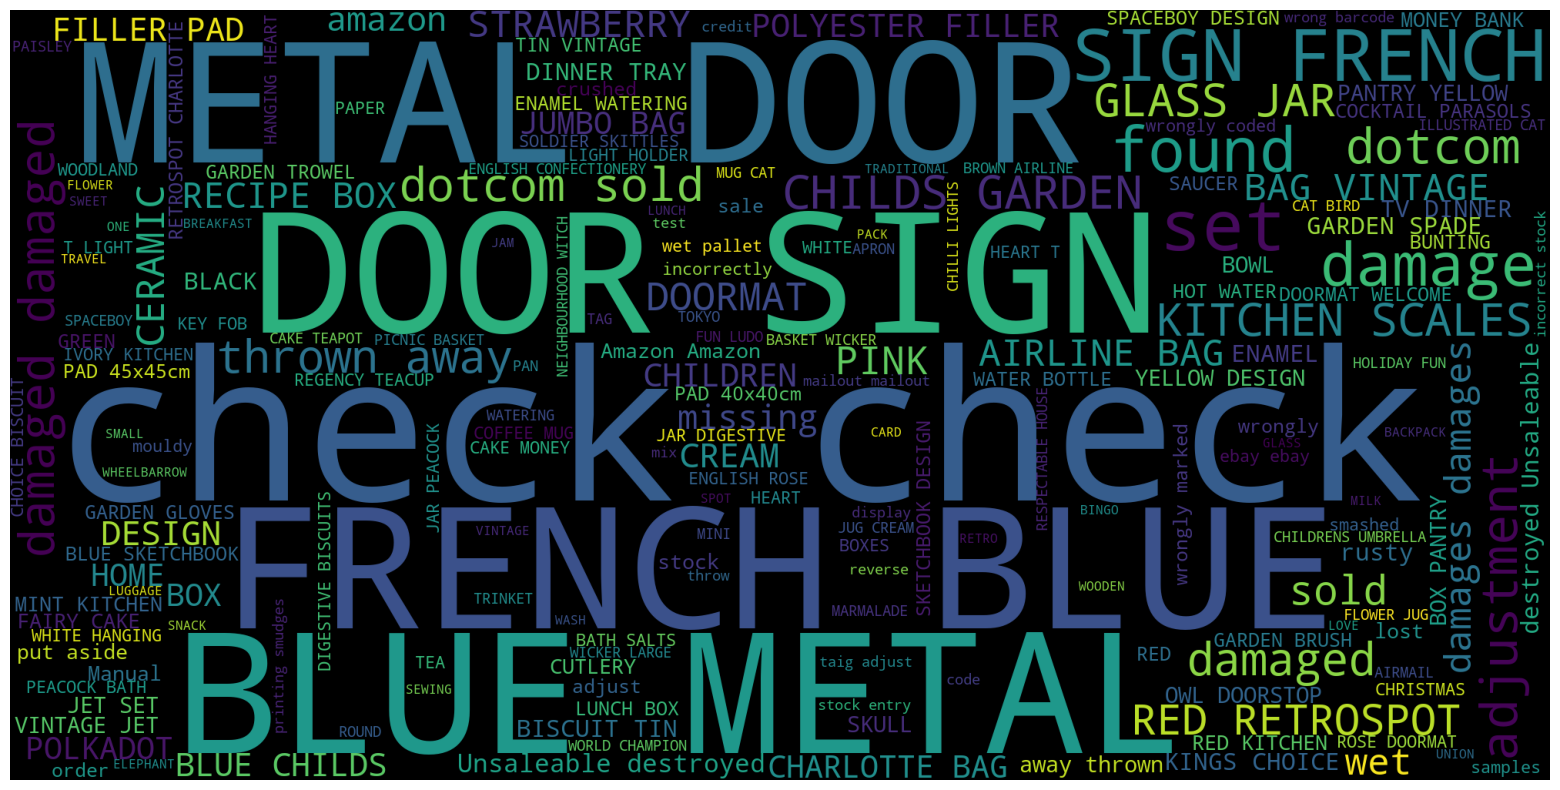

In [19]:
temp=data[data['Price']<=0]
body =temp['Itemname'].dropna().to_string(index=False)

worldcloud.generate(body)

plt.figure(figsize=(22,10))
plt.imshow(worldcloud)
plt.axis("off")

In [20]:
data.duplicated().sum()

5286

In [21]:
data.drop_duplicates(inplace=True)

In [22]:
data['Itemname'] = data['Itemname'].str.strip()

In [23]:
data.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    133967
Country            0
dtype: int64

In [24]:
data.isnull().mean()*100

BillNo         0.000000
Itemname       0.281552
Quantity       0.000000
Date           0.000000
Price          0.000000
CustomerID    25.923511
Country        0.000000
dtype: float64

<Axes: >

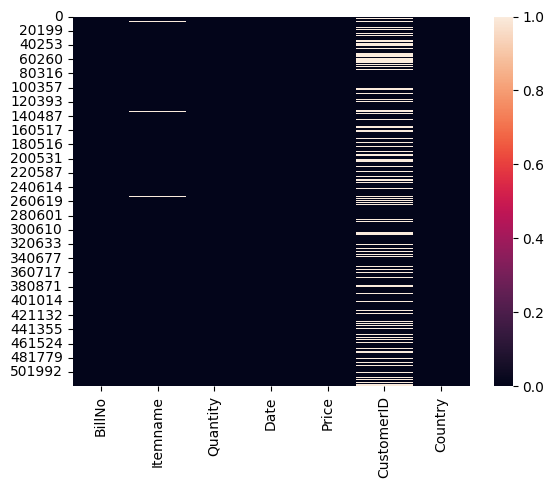

In [25]:
sns.heatmap(data.isnull())

In [26]:
data['Date']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
522059   2011-12-09 12:50:00
522060   2011-12-09 12:50:00
522061   2011-12-09 12:50:00
522062   2011-12-09 12:50:00
522063   2011-12-09 12:50:00
Name: Date, Length: 516778, dtype: datetime64[ns]

In [27]:
import datetime as datetime
from datetime import datetime


data['date'] = data['Date'].dt.date
data['hour'] = data['Date'].dt.hour


data['date']= pd.to_datetime(data['date'], infer_datetime_format= True)
data.drop('Date',inplace=True,axis=1)

data.head(3)

BillNo                            Itemname  Quantity  Price  CustomerID  \
0  536365  WHITE HANGING HEART T-LIGHT HOLDER         6   2.55     17850.0   
1  536365                 WHITE METAL LANTERN         6   3.39     17850.0   
2  536365      CREAM CUPID HEARTS COAT HANGER         8   2.75     17850.0   

          Country       date  hour  
0  United Kingdom 2010-12-01     8  
1  United Kingdom 2010-12-01     8  
2  United Kingdom 2010-12-01     8

In [28]:
data[data['Quantity']<=0]

BillNo Itemname  Quantity  Price  CustomerID         Country  \
2359    536589      NaN       -10    0.0         NaN  United Kingdom   
4289    536764      NaN       -38    0.0         NaN  United Kingdom   
6998    536996      NaN       -20    0.0         NaN  United Kingdom   
6999    536997      NaN       -20    0.0         NaN  United Kingdom   
7000    536998      NaN        -6    0.0         NaN  United Kingdom   
...        ...      ...       ...    ...         ...             ...   
515634  581210    check       -26    0.0         NaN  United Kingdom   
515636  581212     lost     -1050    0.0         NaN  United Kingdom   
515637  581213    check       -30    0.0         NaN  United Kingdom   
517209  581226  missing      -338    0.0         NaN  United Kingdom   
519172  581422  smashed      -235    0.0         NaN  United Kingdom   

             date  hour  
2359   2010-12-01    16  
4289   2010-12-02    14  
6998   2010-12-03    15  
6999   2010-12-03    15  
7000   2010-12-03    15  
...           ...   ...  
515634 2011-12-07    18  
515636 2011-12-07    18  
515637 2011-12-07    18  
517209 2011-12-08     9  
519172 2011-12-08    15  

[1336 rows x 8 columns]

In [29]:
data[data['Price']<=0]

BillNo                      Itemname  Quantity  Price  CustomerID  \
613     536414                           NaN        56    0.0         NaN   
1937    536545                           NaN         1    0.0         NaN   
1938    536546                           NaN         1    0.0         NaN   
1939    536547                           NaN         1    0.0         NaN   
1940    536549                           NaN         1    0.0         NaN   
...        ...                           ...       ...    ...         ...   
517266  581234                           NaN        27    0.0         NaN   
518770  581406  POLYESTER FILLER PAD 45x45cm       240    0.0         NaN   
518771  581406  POLYESTER FILLER PAD 40x40cm       300    0.0         NaN   
518820  581408                           NaN        20    0.0         NaN   
519172  581422                       smashed      -235    0.0         NaN   

               Country       date  hour  
613     United Kingdom 2010-12-01    11  
1937    United Kingdom 2010-12-01    14  
1938    United Kingdom 2010-12-01    14  
1939    United Kingdom 2010-12-01    14  
1940    United Kingdom 2010-12-01    14  
...                ...        ...   ...  
517266  United Kingdom 2011-12-08    10  
518770  United Kingdom 2011-12-08    13  
518771  United Kingdom 2011-12-08    13  
518820  United Kingdom 2011-12-08    14  
519172  United Kingdom 2011-12-08    15  

[2508 rows x 8 columns]

In [30]:

data=data[data['Quantity']>0]


data=data[data['Price']>0]
data.shape

(514270, 8)

Text(0.5, 1.0, 'Quantity')

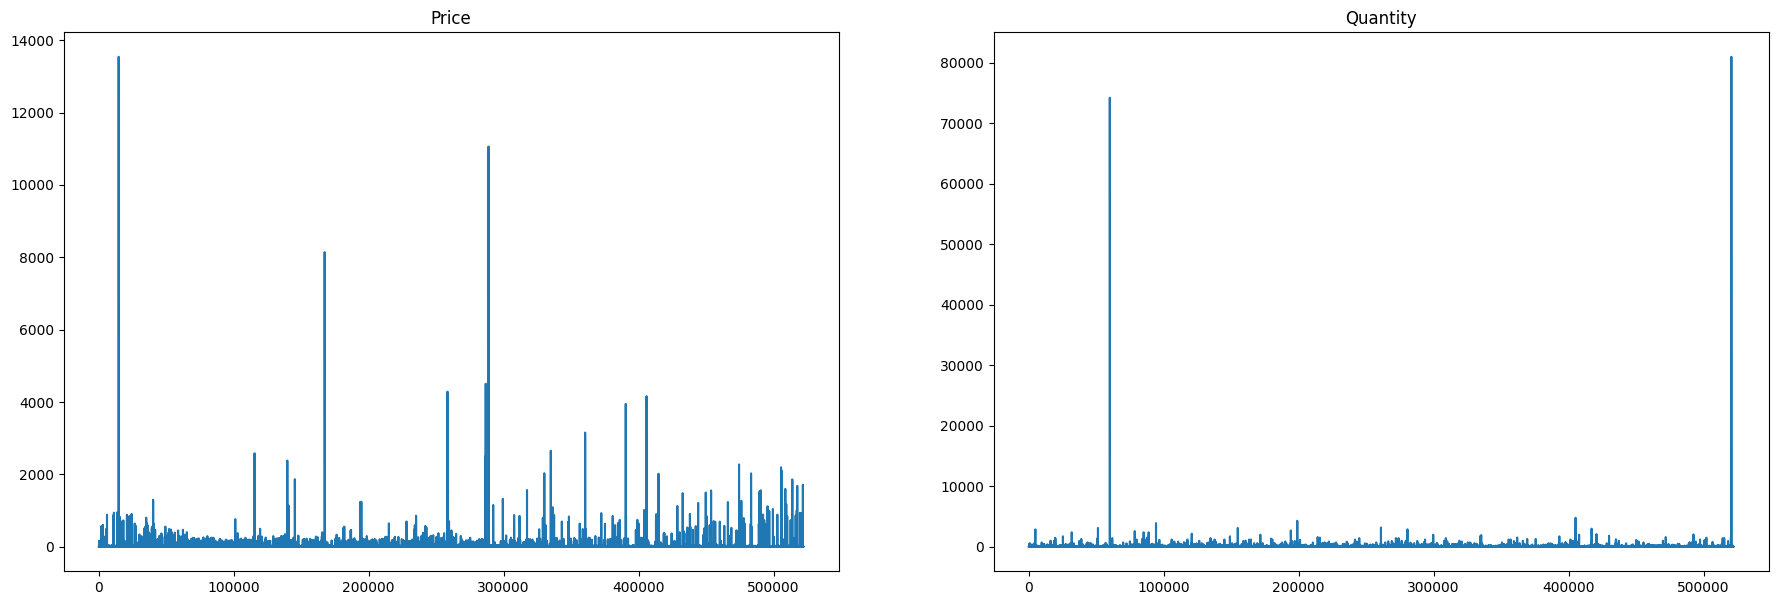

In [31]:
plt.figure(figsize=(22,7))
plt.subplot(1,2,1)
data.Price.plot()
plt.title("Price")
plt.subplot(1,2,2)
data.Quantity.plot()
plt.title("Quantity")

In [32]:
data.sort_values(by='Quantity',ascending=False)

BillNo                             Itemname  Quantity  Price  \
520583  581483          PAPER CRAFT , LITTLE BIRDIE     80995   2.08   
59999   541431       MEDIUM CERAMIC TOP STORAGE JAR     74215   1.04   
405138  573008    WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800   0.21   
198929  554868                 SMALL POPCORN HOLDER      4300   0.72   
94245   544612                EMPIRE DESIGN ROSETTE      3906   0.82   
...        ...                                  ...       ...    ...   
382839  571243               LE GRAND TRAY CHIC SET         1  12.50   
382842  571243             REGENCY CAKESTAND 3 TIER         1  12.75   
160161  550835                 DOORMAT ENGLISH ROSE         1   7.95   
160164  550836  CLASSIC METAL BIRDCAGE PLANT HOLDER         1  12.75   
356890  569208      GLASS APOTHECARY BOTTLE PERFUME         1   3.95   

        CustomerID         Country       date  hour  
520583     16446.0  United Kingdom 2011-12-09     9  
59999      12346.0  United Kingdom 2011-01-18    10  
405138     12901.0  United Kingdom 2011-10-27    12  
198929     13135.0  United Kingdom 2011-05-27    10  
94245      18087.0  United Kingdom 2011-02-22    10  
...            ...             ...        ...   ...  
382839     14595.0  United Kingdom 2011-10-14    15  
382842     14595.0  United Kingdom 2011-10-14    15  
160161     15034.0  United Kingdom 2011-04-21    10  
160164     14759.0  United Kingdom 2011-04-21    10  
356890     16693.0  United Kingdom 2011-10-02    11  

[514270 rows x 8 columns]

In [33]:
data.sort_values(by='Price',ascending=False)

BillNo                    Itemname  Quantity      Price  CustomerID  \
14696    537632                  AMAZON FEE         1  13541.330         NaN   
288772  A563185             Adjust bad debt         1  11062.060         NaN   
167329   551697                     POSTAGE         1   8142.750     16029.0   
286674   562955              DOTCOM POSTAGE         1   4505.170         NaN   
258372   560373                      Manual         1   4287.630         NaN   
...         ...                         ...       ...        ...         ...   
504147   580513  POPART WOODEN PENCILS ASST       100      0.040     14456.0   
346188   568200  PADS TO MATCH ALL CUSHIONS         1      0.001     16198.0   
347944   568375                Bank Charges         1      0.001     13405.0   
268879   561226  PADS TO MATCH ALL CUSHIONS         1      0.001     15618.0   
151547   550193  PADS TO MATCH ALL CUSHIONS         1      0.001     13952.0   

               Country       date  hour  
14696   United Kingdom 2010-12-07    15  
288772  United Kingdom 2011-08-12    14  
167329  United Kingdom 2011-05-03    13  
286674  United Kingdom 2011-08-11    10  
258372  United Kingdom 2011-07-18    12  
...                ...        ...   ...  
504147  United Kingdom 2011-12-04    13  
346188  United Kingdom 2011-09-25    14  
347944  United Kingdom 2011-09-26    17  
268879  United Kingdom 2011-07-26    10  
151547  United Kingdom 2011-04-15     9  

[514270 rows x 8 columns]

In [34]:
data=data[data['Price']<5000]
data=data[data['Quantity']<5000]

<Axes: xlabel='hour', ylabel='count'>

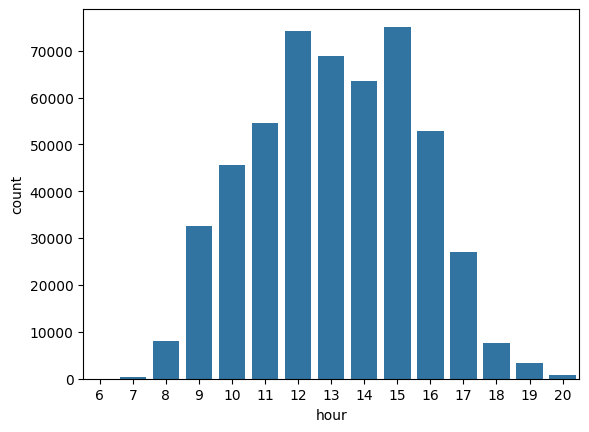

In [35]:
sns.countplot(data=data,x='hour')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(1, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(2, 0, 'LUNCH BAG RED RETROSPOT'),
  Text(3, 0, 'PACK OF 72 RETROSPOT CAKE CASES'),
  Text(4, 0, 'NATURAL SLATE HEART CHALKBOARD'),
  Text(5, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(6, 0, 'LUNCH BAG  BLACK SKULL.'),
  Text(7, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(8, 0, 'PARTY BUNTING'),
  Text(9, 0, 'SET OF 3 CAKE TINS PANTRY DESIGN')])

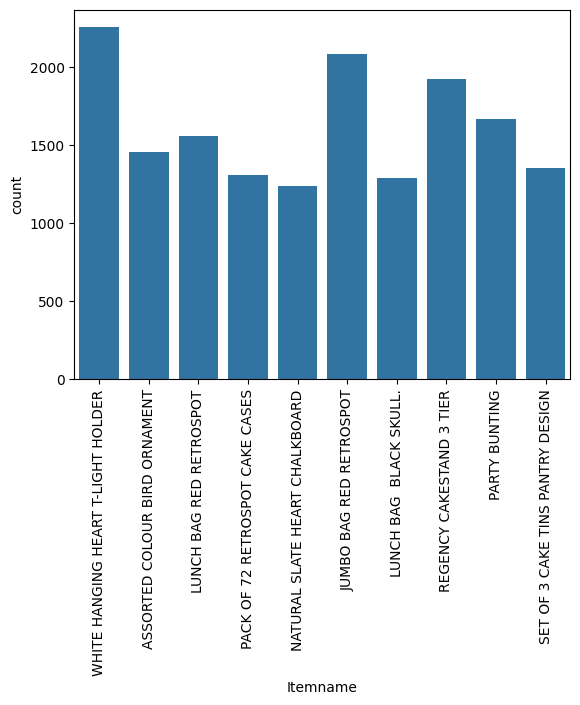

In [36]:

top_10_items = data['Itemname'].value_counts().nlargest(10).index


df_top_10 = data[data['Itemname'].isin(top_10_items)]


ax=sns.countplot(data=df_top_10, x='Itemname')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'Netherlands'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Norway'),
  Text(6, 0, 'Switzerland'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'Portugal'),
  Text(9, 0, 'Belgium')])

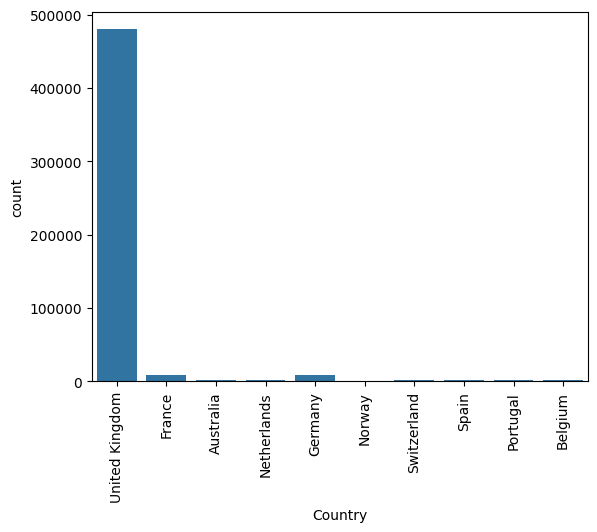

In [37]:

top_5_country = data['Country'].value_counts().nlargest(10).index


df_top_5 = data[data['Country'].isin(top_5_country)]


ax=sns.countplot(data=df_top_5, x='Country')
plt.xticks(rotation=90)

In [38]:
data.Country.value_counts().head(10)

Country
United Kingdom    479903
Germany             9025
France              8392
Spain               2479
Netherlands         2359
Belgium             2031
Switzerland         1958
Portugal            1492
Australia           1181
Norway              1071
Name: count, dtype: int64

In [40]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [41]:
mybasket= (data[data['Country'] =="Germany"]
          .groupby(['BillNo', 'Itemname'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('BillNo'))

mybasket

Itemname  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
BillNo                                                         
536527                       0.0                         0.0   
536840                       0.0                         0.0   
536861                       0.0                         0.0   
536967                       0.0                         0.0   
536983                       0.0                         0.0   
...                          ...                         ...   
581266                       0.0                         0.0   
581494                       0.0                         0.0   
581570                       0.0                         0.0   
581574                       0.0                         0.0   
581578                       0.0                         0.0   

Itemname  12 IVORY ROSE PEG PLACE SETTINGS  12 MESSAGE CARDS WITH ENVELOPES  \
BillNo                                                                        
536527                                 0.0                              0.0   
536840                                 0.0                              0.0   
536861                                 0.0                              0.0   
536967                                 0.0                              0.0   
536983                                 0.0                              0.0   
...                                    ...                              ...   
581266                                 0.0                              0.0   
581494                                 0.0                              0.0   
581570                                 0.0                              0.0   
581574                                 0.0                              0.0   
581578                                 0.0                              0.0   

Itemname  12 PENCIL SMALL TUBE WOODLAND  12 PENCILS SMALL TUBE RED RETROSPOT  \
BillNo                                                                         
536527                              0.0                                  0.0   
536840                              0.0                                  0.0   
536861                              0.0                                  0.0   
536967                              0.0                                  0.0   
536983                              0.0                                  0.0   
...                                 ...                                  ...   
581266                              0.0                                  0.0   
581494                              0.0                                  0.0   
581570                              0.0                                  0.0   
581574                              0.0                                  0.0   
581578                              0.0                                  0.0   

Itemname  12 PENCILS SMALL TUBE SKULL  12 PENCILS TALL TUBE POSY  \
BillNo                                                             
536527                            0.0                        0.0   
536840                            0.0                        0.0   
536861                            0.0                        0.0   
536967                            0.0                        0.0   
536983                            0.0                        0.0   
...                               ...                        ...   
581266                            0.0                        0.0   
581494                            0.0                        0.0   
581570                            0.0                        0.0   
581574                            0.0                        0.0   
581578                            0.0                        0.0   

Itemname  12 PENCILS TALL TUBE RED RETROSPOT  12 PENCILS TALL TUBE SKULLS  \
BillNo                                                                      
536527                                   0.0               

In [42]:
a=data[data['Country']=='Germany']
a['BillNo'].nunique()

457

In [43]:
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket = mybasket.applymap(my_encode_units)
my_basket.drop('POSTAGE', inplace=True, axis=1) #Remove "postage" as an item
### Display sample of set
my_basket

Itemname  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
BillNo                                                         
536527                         0                           0   
536840                         0                           0   
536861                         0                           0   
536967                         0                           0   
536983                         0                           0   
...                          ...                         ...   
581266                         0                           0   
581494                         0                           0   
581570                         0                           0   
581574                         0                           0   
581578                         0                           0   

Itemname  12 IVORY ROSE PEG PLACE SETTINGS  12 MESSAGE CARDS WITH ENVELOPES  \
BillNo                                                                        
536527                                   0                                0   
536840                                   0                                0   
536861                                   0                                0   
536967                                   0                                0   
536983                                   0                                0   
...                                    ...                              ...   
581266                                   0                                0   
581494                                   0                                0   
581570                                   0                                0   
581574                                   0                                0   
581578                                   0                                0   

Itemname  12 PENCIL SMALL TUBE WOODLAND  12 PENCILS SMALL TUBE RED RETROSPOT  \
BillNo                                                                         
536527                                0                                    0   
536840                                0                                    0   
536861                                0                                    0   
536967                                0                                    0   
536983                                0                                    0   
...                                 ...                                  ...   
581266                                0                                    0   
581494                                0                                    0   
581570                                0                                    0   
581574                                0                                    0   
581578                                0                                    0   

Itemname  12 PENCILS SMALL TUBE SKULL  12 PENCILS TALL TUBE POSY  \
BillNo                                                             
536527                              0                          0   
536840                              0                          0   
536861                              0                          0   
536967                              0                          0   
536983                              0                          0   
...                               ...                        ...   
581266                              0                          0   
581494                              0                          0   
581570                              0                          0   
581574                              0                          0   
581578                              0                          0   

Itemname  12 PENCILS TALL TUBE RED RETROSPOT  12 PENCILS TALL TUBE SKULLS  \
BillNo                                                                      
536527                                     0               

In [44]:
data[data['BillNo']==536527]

BillNo                             Itemname  Quantity  Price  \
1099  536527              SET OF 6 T-LIGHTS SANTA         6   2.95   
1100  536527  ROTATING SILVER ANGELS T-LIGHT HLDR         6   2.55   
1101  536527   MULTI COLOUR SILVER T-LIGHT HOLDER        12   0.85   
1102  536527        5 HOOK HANGER MAGIC TOADSTOOL        12   1.65   
1103  536527           3 HOOK HANGER MAGIC GARDEN        12   1.95   
1104  536527    5 HOOK HANGER RED MAGIC TOADSTOOL        12   1.65   
1105  536527  ASSORTED COLOUR LIZARD SUCTION HOOK        24   0.42   
1106  536527           JUMBO BAG WOODLAND ANIMALS        10   1.95   
1107  536527                       JUMBO BAG OWLS        10   1.95   
1108  536527            HOT WATER BOTTLE BABUSHKA         4   4.65   
1109  536527         HOMEMADE JAM SCENTED CANDLES        12   1.45   
1110  536527         CHILDREN'S CIRCUS PARADE MUG        12   1.65   
1111  536527       PACK 3 FIRE ENGINE/CAR PATCHES        12   1.25   
1112  536527                     PICTURE DOMINOES        12   1.45   
1113  536527                              POSTAGE         1  18.00   

      CustomerID  Country       date  hour  
1099     12662.0  Germany 2010-12-01    13  
1100     12662.0  Germany 2010-12-01    13  
1101     12662.0  Germany 2010-12-01    13  
1102     12662.0  Germany 2010-12-01    13  
1103     12662.0  Germany 2010-12-01    13  
1104     12662.0  Germany 2010-12-01    13  
1105     12662.0  Germany 2010-12-01    13  
1106     12662.0  Germany 2010-12-01    13  
1107     12662.0  Germany 2010-12-01    13  
1108     12662.0  Germany 2010-12-01    13  
1109     12662.0  Germany 2010-12-01    13  
1110     12662.0  Germany 2010-12-01    13  
1111     12662.0  Germany 2010-12-01    13  
1112     12662.0  Germany 2010-12-01    13  
1113     12662.0  Germany 2010-12-01    13

In [45]:
support=[0.1, 0.05, 0.01]
confidenceLevels=[0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]


rules_sup10=[0]*9
rules_sup5=[0]*9
rules_sup1=[0]*9

In [46]:

my_frequent_itemsets01 = apriori(my_basket, min_support=0.1, use_colnames=True)
for i in range(len(confidenceLevels)):
    rules_sup10[i]=len(association_rules(my_frequent_itemsets01, metric="confidence", min_threshold=confidenceLevels[i]))


my_frequent_itemsets005 = apriori(my_basket, min_support=0.05, use_colnames=True)
for i in range(len(confidenceLevels)):
    rules_sup5[i]=len(association_rules(my_frequent_itemsets005, metric="confidence", min_threshold=confidenceLevels[i]))


my_frequent_itemsets001 = apriori(my_basket, min_support=0.01, use_colnames=True)
for i in range(len(confidenceLevels)):
    rules_sup1[i]=len(association_rules(my_frequent_itemsets001, metric="confidence", min_threshold=confidenceLevels[i]))

C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types r

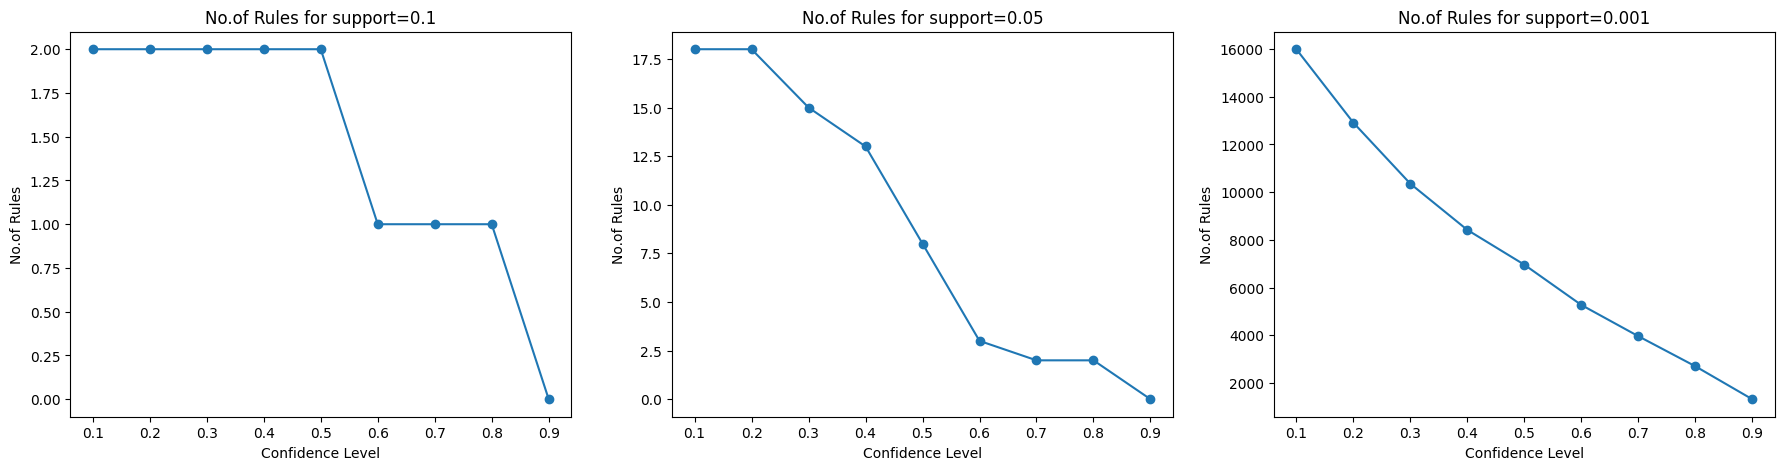

In [47]:
plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
plt.plot(confidenceLevels,rules_sup10, marker='o', label='Support=0.1')
plt.title("No.of Rules for support=0.1")
plt.xlabel("Confidence Level")
plt.ylabel("No.of Rules")
plt.subplot(1,3,2)
plt.plot(confidenceLevels,rules_sup5, marker='o', label='Support=0.1')
plt.title("No.of Rules for support=0.05")
plt.xlabel("Confidence Level")
plt.ylabel("No.of Rules")
plt.subplot(1,3,3)
plt.plot(confidenceLevels,rules_sup1, marker='o', label='Support=0.1')
plt.title("No.of Rules for support=0.001")
plt.xlabel("Confidence Level")
plt.ylabel("No.of Rules")
plt.savefig("comparision")

In [48]:
my_frequent_itemsets = apriori(my_basket, min_support=0.07, use_colnames=True)

C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [49]:
myrules=association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)

In [50]:
myrules

antecedents                           consequents  \
0    (PLASTERS IN TIN WOODLAND ANIMALS)  (ROUND SNACK BOXES SET OF4 WOODLAND)   
1  (ROUND SNACK BOXES SET OF4 WOODLAND)    (PLASTERS IN TIN WOODLAND ANIMALS)   
2   (ROUND SNACK BOXES SET OF 4 FRUITS)  (ROUND SNACK BOXES SET OF4 WOODLAND)   
3  (ROUND SNACK BOXES SET OF4 WOODLAND)   (ROUND SNACK BOXES SET OF 4 FRUITS)   
4                  (SPACEBOY LUNCH BOX)  (ROUND SNACK BOXES SET OF4 WOODLAND)   
5  (ROUND SNACK BOXES SET OF4 WOODLAND)                  (SPACEBOY LUNCH BOX)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.137856            0.245077  0.074398    0.539683  2.202098   
1            0.245077            0.137856  0.074398    0.303571  2.202098   
2            0.157549            0.245077  0.131291    0.833333  3.400298   
3            0.245077            0.157549  0.131291    0.535714  3.400298   
4            0.102845            0.245077  0.070022    0.680851  2.778116   
5            0.245077            0.102845  0.070022    0.285714  2.778116   

   leverage  conviction  zhangs_metric  
0  0.040613    1.640006       0.633174  
1  0.040613    1.237951       0.723103  
2  0.092679    4.529540       0.837922  
3  0.092679    1.814509       0.935072  
4  0.044817    2.365427       0.713415  
5  0.044817    1.256018       0.847826

In [51]:
mybasket= (data[data['Country'] =="France"]
          .groupby(['BillNo', 'Itemname'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('BillNo'))

mybasket

def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket = mybasket.applymap(my_encode_units)
my_basket.drop('POSTAGE', inplace=True, axis=1) #Remove "postage" as an item
### Display sample of set
my_basket

Itemname  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
BillNo                                                         
536370                         0                           0   
536852                         0                           0   
536974                         0                           0   
537065                         0                           0   
537463                         0                           0   
...                          ...                         ...   
580986                         0                           0   
581001                         0                           0   
581171                         0                           0   
581279                         0                           0   
581587                         0                           0   

Itemname  12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  \
BillNo                                                                 
536370                            0                                0   
536852                            0                                0   
536974                            0                                0   
537065                            0                                0   
537463                            0                                0   
...                             ...                              ...   
580986                            0                                0   
581001                            0                                0   
581171                            0                                0   
581279                            0                                0   
581587                            0                                0   

Itemname  12 PENCIL SMALL TUBE WOODLAND  12 PENCILS SMALL TUBE RED RETROSPOT  \
BillNo                                                                         
536370                                0                                    0   
536852                                0                                    0   
536974                                0                                    0   
537065                                0                                    0   
537463                                0                                    0   
...                                 ...                                  ...   
580986                                0                                    0   
581001                                0                                    0   
581171                                0                                    0   
581279                                0                                    0   
581587                                0                                    0   

Itemname  12 PENCILS SMALL TUBE SKULL  12 PENCILS TALL TUBE POSY  \
BillNo                                                             
536370                              0                          0   
536852                              0                          0   
536974                              0                          0   
537065                              0                          0   
537463                              0                          0   
...                               ...                        ...   
580986                              0                          0   
581001                              0                          0   
581171                              0                          0   
581279                              0                          0   
581587                              0                          0   

Itemname  12 PENCILS TALL TUBE RED RETROSPOT  12 PENCILS TALL TUBE WOODLAND  \
BillNo                                                                        
536370                                     0                              0   
536852                                     0                       

C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types r

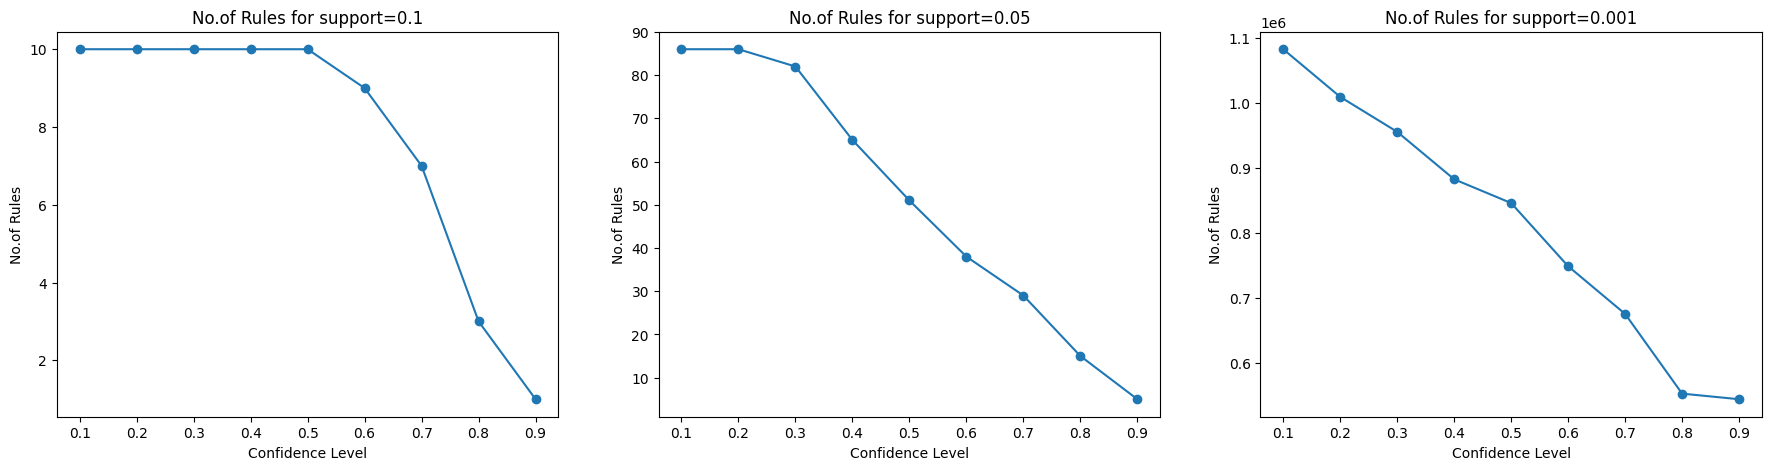

In [52]:
support=[0.1, 0.05, 0.01]
confidenceLevels=[0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]


rules_sup10=[0]*9
rules_sup5=[0]*9
rules_sup1=[0]*9


my_frequent_itemsets01 = apriori(my_basket, min_support=0.1, use_colnames=True)
for i in range(len(confidenceLevels)):
    rules_sup10[i]=len(association_rules(my_frequent_itemsets01, metric="confidence", min_threshold=confidenceLevels[i]))


my_frequent_itemsets005 = apriori(my_basket, min_support=0.05, use_colnames=True)
for i in range(len(confidenceLevels)):
    rules_sup5[i]=len(association_rules(my_frequent_itemsets005, metric="confidence", min_threshold=confidenceLevels[i]))


my_frequent_itemsets001 = apriori(my_basket, min_support=0.01, use_colnames=True)
for i in range(len(confidenceLevels)):
    rules_sup1[i]=len(association_rules(my_frequent_itemsets001, metric="confidence", min_threshold=confidenceLevels[i]))
    


plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
plt.plot(confidenceLevels,rules_sup10, marker='o', label='Support=0.1')
plt.title("No.of Rules for support=0.1")
plt.xlabel("Confidence Level")
plt.ylabel("No.of Rules")
plt.subplot(1,3,2)
plt.plot(confidenceLevels,rules_sup5, marker='o', label='Support=0.1')
plt.title("No.of Rules for support=0.05")
plt.xlabel("Confidence Level")
plt.ylabel("No.of Rules")
plt.subplot(1,3,3)
plt.plot(confidenceLevels,rules_sup1, marker='o', label='Support=0.1')
plt.title("No.of Rules for support=0.001")
plt.xlabel("Confidence Level")
plt.ylabel("No.of Rules")
plt.savefig("comparision")

In [53]:

my_frequent_itemsets = apriori(my_basket, min_support=0.10, use_colnames=True)
myrules=association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)
myrules

C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


antecedents                           consequents  \
0    (PLASTERS IN TIN WOODLAND ANIMALS)       (PLASTERS IN TIN CIRCUS PARADE)   
1       (PLASTERS IN TIN CIRCUS PARADE)    (PLASTERS IN TIN WOODLAND ANIMALS)   
2            (PLASTERS IN TIN SPACEBOY)    (PLASTERS IN TIN WOODLAND ANIMALS)   
3    (PLASTERS IN TIN WOODLAND ANIMALS)            (PLASTERS IN TIN SPACEBOY)   
4         (SET/6 RED SPOTTY PAPER CUPS)  (SET/20 RED RETROSPOT PAPER NAPKINS)   
5  (SET/20 RED RETROSPOT PAPER NAPKINS)         (SET/6 RED SPOTTY PAPER CUPS)   
6       (SET/6 RED SPOTTY PAPER PLATES)  (SET/20 RED RETROSPOT PAPER NAPKINS)   
7  (SET/20 RED RETROSPOT PAPER NAPKINS)       (SET/6 RED SPOTTY PAPER PLATES)   
8       (SET/6 RED SPOTTY PAPER PLATES)         (SET/6 RED SPOTTY PAPER CUPS)   
9         (SET/6 RED SPOTTY PAPER CUPS)       (SET/6 RED SPOTTY PAPER PLATES)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.170918            0.168367  0.102041    0.597015  3.545907   
1            0.168367            0.170918  0.102041    0.606061  3.545907   
2            0.137755            0.170918  0.104592    0.759259  4.442233   
3            0.170918            0.137755  0.104592    0.611940  4.442233   
4            0.137755            0.132653  0.102041    0.740741  5.584046   
5            0.132653            0.137755  0.102041    0.769231  5.584046   
6            0.127551            0.132653  0.102041    0.800000  6.030769   
7            0.132653            0.127551  0.102041    0.769231  6.030769   
8            0.127551            0.137755  0.122449    0.960000  6.968889   
9            0.137755            0.127551  0.122449    0.888889  6.968889   

   leverage  conviction  zhangs_metric  
0  0.073264    2.063681       0.866000  
1  0.073264    2.104592       0.863344  
2  0.081047    3.443878       0.898687  
3  0.081047    2.221939       0.934634  
4  0.083767    3.345481       0.952071  
5  0.083767    3.736395       0.946471  
6  0.085121    4.336735       0.956140  
7  0.085121    3.780612       0.961765  
8  0.104878   21.556122       0.981725  
9  0.104878    7.852041       0.993343